In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import mean_absolute_error, r2_score
%matplotlib inline
import os
import pickle
from sklearn.metrics import r2_score


In [2]:
from sklearn.neighbors import KNeighborsRegressor
with open('./Input/gap_29.pkl', 'rb') as file:
    x = pickle.load(file)

with open('./Input/EnergyGap.pkl', 'rb') as file:
    y = pickle.load(file)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=42)
model = KNeighborsRegressor()

model.fit(x_train, y_train)

y_train_pred = model.predict(x_train)
r2_train = r2_score(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)

y_test_pred = model.predict(x_test)
r2_test = r2_score(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

y_val_pred = model.predict(x_val)
r2_val = r2_score(y_val, y_val_pred)
mae_val = mean_absolute_error(y_val, y_val_pred)

print("最终模型")
print("训练集 R2:", r2_train)
print("测试集 R2:", r2_test)
print("验证集 R2:", r2_val)
print("训练集MAE", mae_train)
print("测试集MAE", mae_test)
print("验证集MAE", mae_val)



d:\Software\anaconda\envs\ml311\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] 系统找不到指定的文件。
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "d:\Software\anaconda\envs\ml311\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "d:\Software\anaconda\envs\ml311\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\Software\anaconda\envs\ml311\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "d:\Software\anaconda\envs\ml311\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.Crea

最终模型
训练集 R2: 0.8941755890846252
测试集 R2: 0.8360354900360107
验证集 R2: 0.843269407749176
训练集MAE 0.0100722
测试集MAE 0.012456712
验证集MAE 0.012553692


In [3]:
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)
y_val_pred = model.predict(x_val)

In [5]:
from sklearn.metrics import r2_score
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
r2_val = r2_score(y_val, y_val_pred)

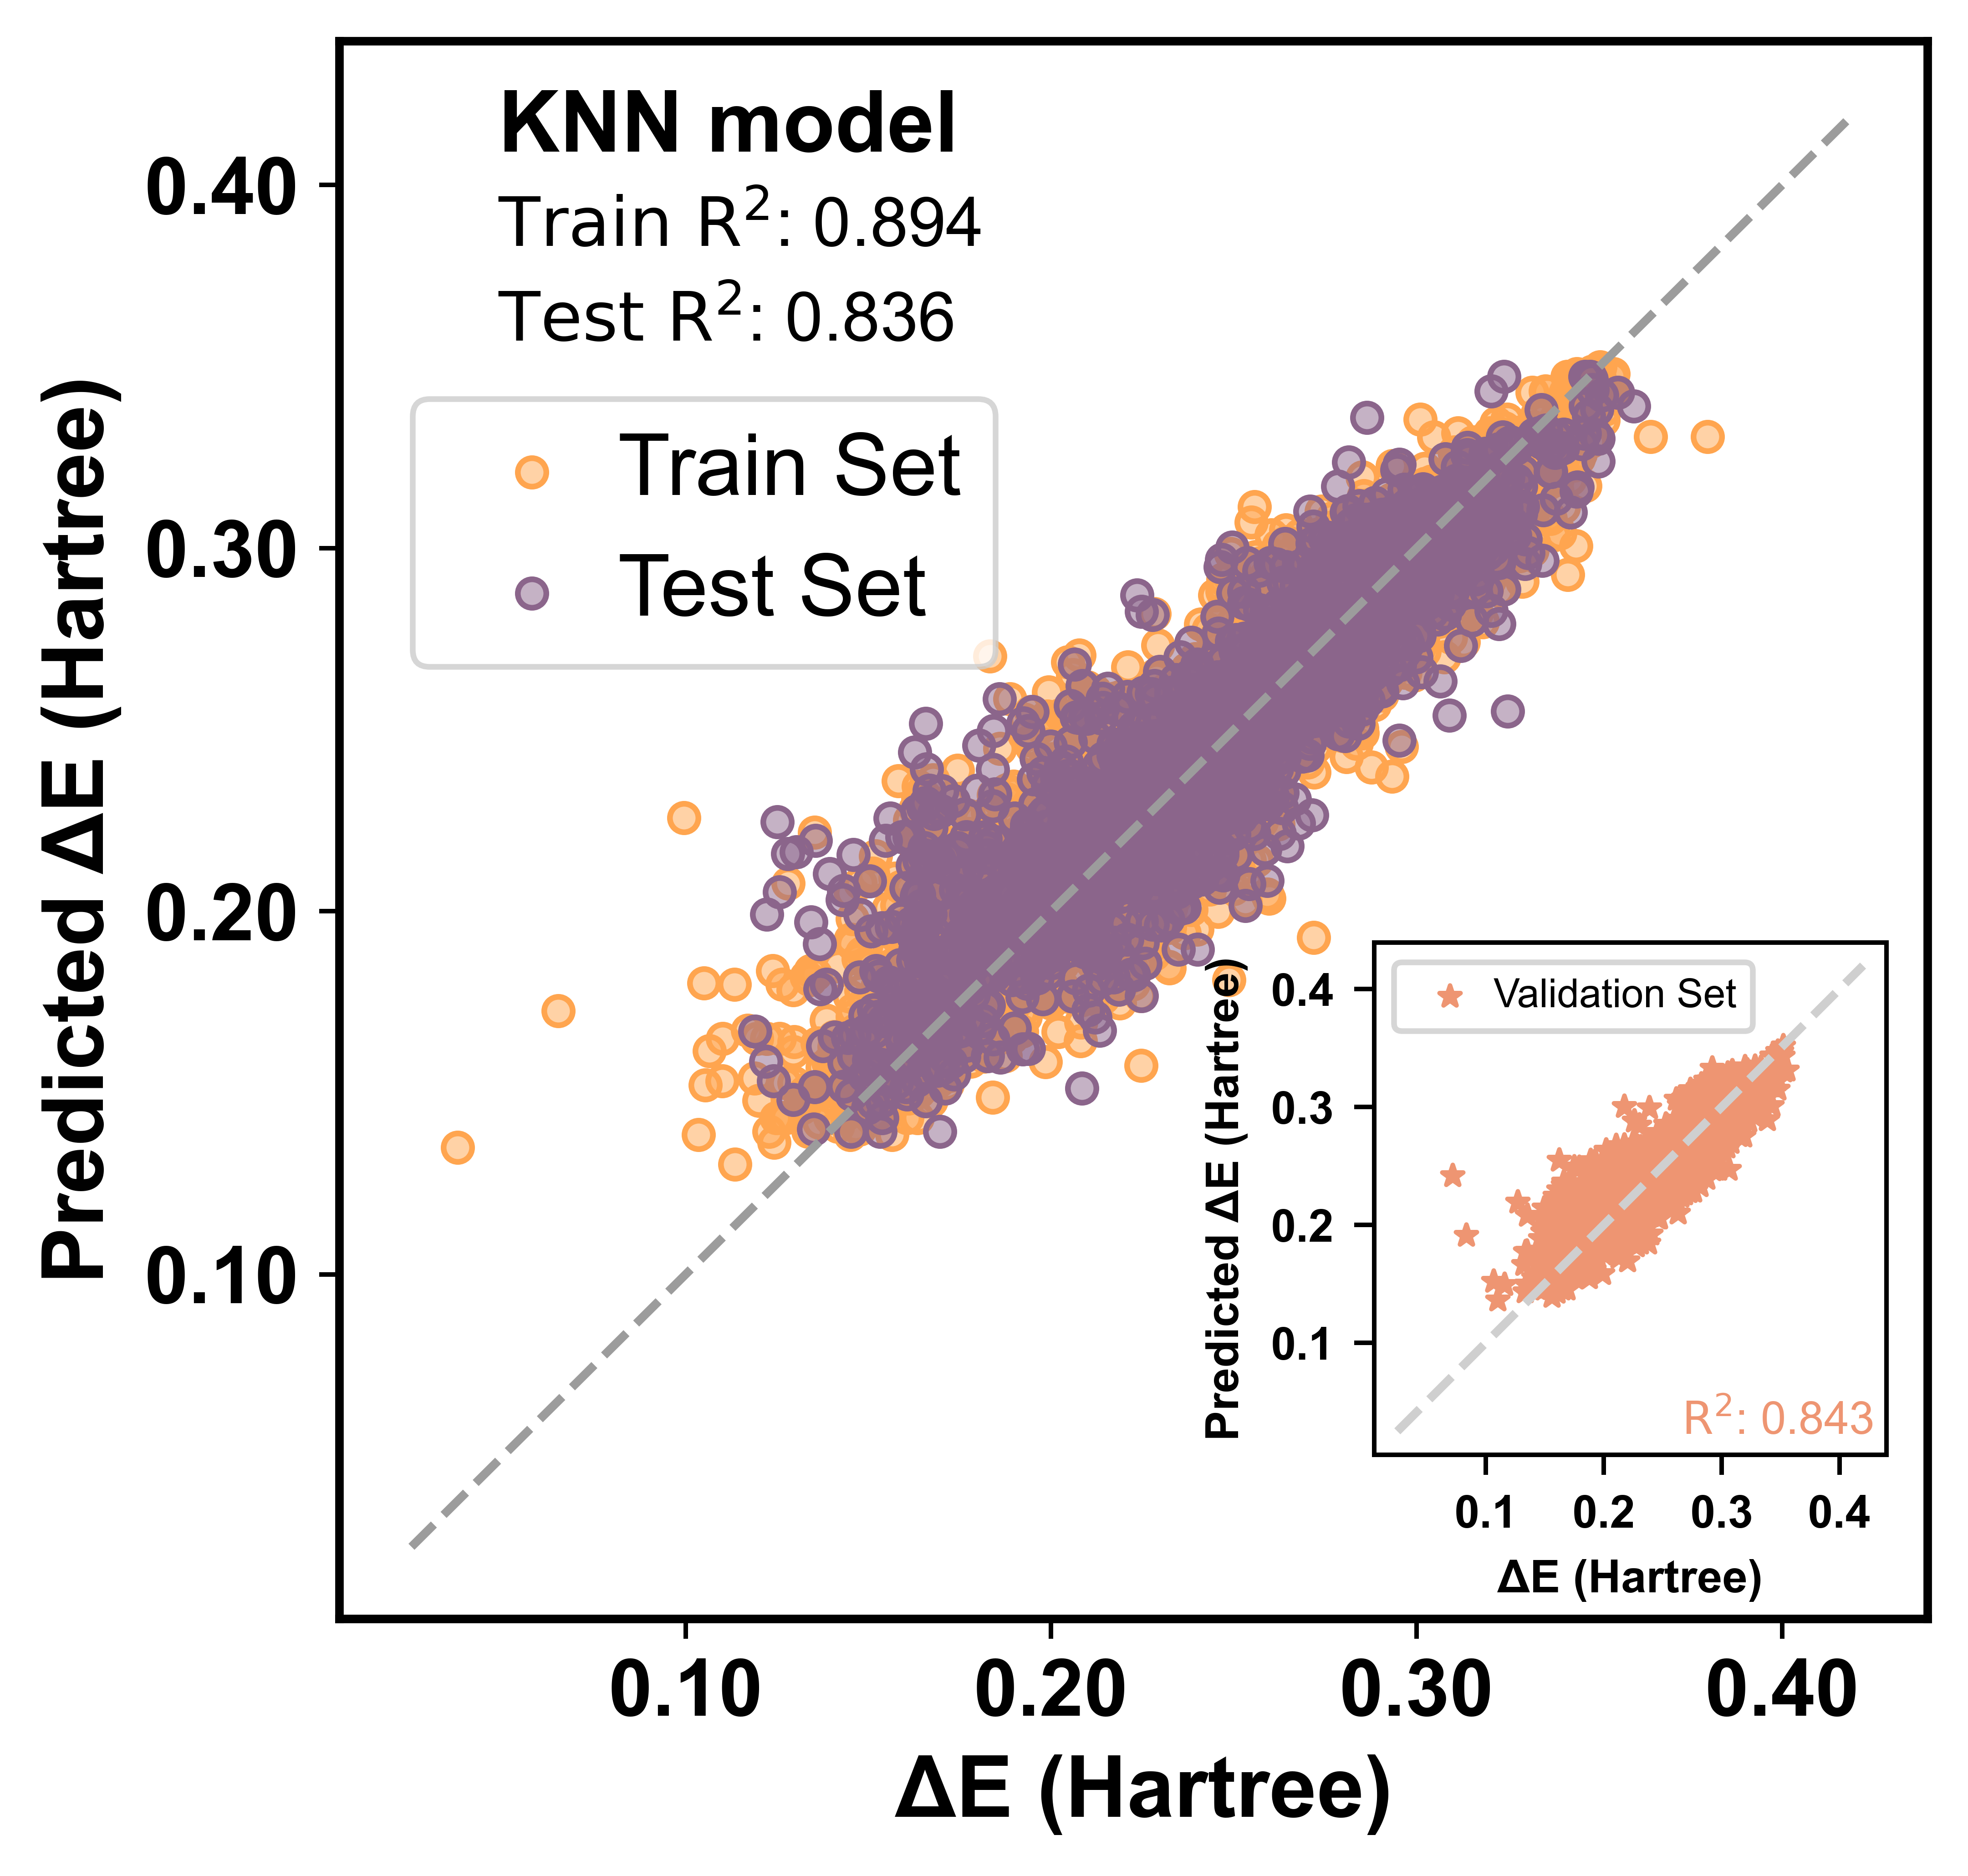

In [11]:

import matplotlib.ticker as ticker
plt.rcParams.update({'font.family': 'Arial'})
plt.figure(figsize=(5, 5), dpi=900)
train_scatter = plt.scatter(y_train, y_train_pred, 
                           marker='o', 
                           edgecolor='#FFA54F',
                           linewidths=1,
                           facecolor=(1, 0.65, 0.31, 0.5), 
                           s=25, 
                           label='Train Set')

test_scatter = plt.scatter(y_test, y_test_pred,
                          marker='o',
                          edgecolor='#8B658B', 
                          linewidths=1,
                          facecolor=(0.55, 0.4, 0.55, 0.5),  
                          s=25,
                          label='Test Set')


plt.gca().set_xticks(np.arange(0, 0.42, 0.1)) 
plt.gca().set_yticks(np.arange(0, 0.42, 0.1))

ax = plt.gca()
ax.tick_params(axis='both', which='major', labelsize=14)
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:.2f}'))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:.2f}'))

for label in ax.get_xticklabels() + ax.get_yticklabels():
    #label.set_fontsize(10)
    label.set_weight('bold')

  
ax.spines['top'].set_linewidth(1.5)
ax.spines['right'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)


plt.plot([0.025, 0.42], [0.025, 0.42], ls='--', c='#9C9C9C')

font = {'family': 'Arial', 'size': 15}
bold_font = {'family': 'Arial', 'size': 15, 'weight': 'bold'}


plt.legend(bbox_to_anchor=(0.44, 0.8),handletextpad=0.01,prop=font)


plt.xlabel(' ΔE (Hartree)', fontdict=bold_font)
plt.ylabel('Predicted ΔE (Hartree)', fontdict=bold_font)

ax = plt.gca()
plt.text(x=0.1, y=0.93, s='KNN model', fontdict={'family': 'Arial', 'size': 15, 'weight': 'bold'}, transform=ax.transAxes)
plt.text(x=0.1, y=0.87, s=r'$\mathrm{Train\ R^2}$: %.3f' % r2_train, fontdict={'family': 'Arial', 'size': 12}, transform=ax.transAxes)
plt.text(x=0.1, y=0.81, s=r'$\mathrm{Test\ R^2}$: %.3f' % r2_test, fontdict={'family': 'Arial', 'size': 12}, transform=ax.transAxes)

ax2 = plt.axes([0.63, 0.19, 0.25, 0.25]) 


ax2.set_xticks(np.arange(0, 0.42, 0.1))  
ax2.set_yticks(np.arange(0, 0.42, 0.1))
small_font = {'family': 'Arial', 'size': 8}
small_bold_font = {'family': 'Arial', 'size': 8, 'weight': 'bold'}
plt.xlabel('ΔE (Hartree)', fontdict=small_bold_font)
plt.plot([0.025, 0.42], [0.025, 0.42], ls='--',c='#CFCFCF')
plt.ylabel('Predicted ΔE (Hartree)', fontdict=small_bold_font)
plt.scatter(y_val, y_val_pred, marker='*', c='#EE9572', s=15,linewidths=0.8,facecolor = 'none',label='Validation Set')
plt.text(x=0.6, y=0.04, s=r'$\mathrm{ R^2}$: %.3f' % r2_val,c='#EE9572', fontdict=small_font,transform = ax2.transAxes)

for label in ax2.get_xticklabels() + ax2.get_yticklabels():
    label.set_fontsize(8)
    label.set_weight('bold')  # Set the font weight to bold
plt.legend(loc=0, fontsize=7,handletextpad=0.1)
ax2.tick_params(axis='both', labelsize=8)

plt.savefig('gap-GB.tif', format='tiff', dpi=1200,bbox_inches='tight')
plt.show()